<a href="https://colab.research.google.com/github/Mohini-katyal/Sahaay-Project-Vision/blob/main/MaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 151M/163M [00:00<00:00, 181MB/s]
100% 163M/163M [00:01<00:00, 163MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 data			'Screenshot 2024-06-01 112901.png'  'Screenshot 2024-06-01 113254.png'
 face-mask-dataset.zip	'Screenshot 2024-06-01 112928.png'  'Screenshot 2024-06-01 113552.png'
 k.png			'Screenshot 2024-06-01 113010.png'  'Screenshot 2024-06-01 113710.png'
 lm.jpg			'Screenshot 2024-06-01 113041.png'  'Screenshot 2024-06-01 113815.png'
 sample_data		'Screenshot 2024-06-01 113232.png'  'Screenshot 2024-06-01 113948.png'


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])   #first 5
print(with_mask_files[-5:])   #last 5 file names

['with_mask_3141.jpg', 'with_mask_3577.jpg', 'with_mask_2780.jpg', 'with_mask_2556.jpg', 'with_mask_2218.jpg']
['with_mask_1770.jpg', 'with_mask_3217.jpg', 'with_mask_2343.jpg', 'with_mask_3406.jpg', 'with_mask_1635.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_9.jpg', 'without_mask_3369.jpg', 'without_mask_1559.jpg', 'without_mask_564.jpg', 'without_mask_570.jpg']
['without_mask_1833.jpg', 'without_mask_2471.jpg', 'without_mask_3254.jpg', 'without_mask_1264.jpg', 'without_mask_1483.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [12]:
#combining the 2 lists
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

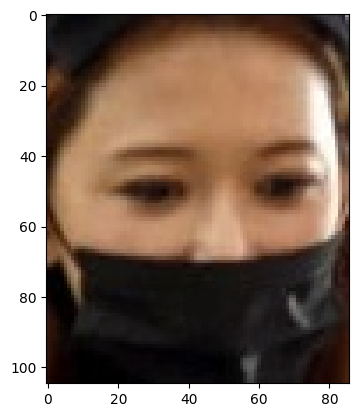

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()                 #first reading image as numpy array, then displaying it as matplotlib plot

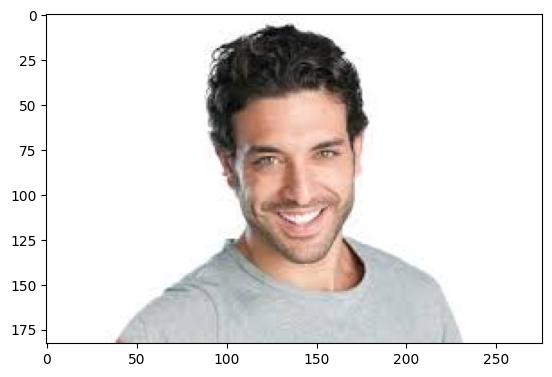

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)   #because of this line, we need to add / in with_mask_path, to complete path
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
print(type(data))
print(len(data))
print(data[0])
print(type(data[0]))
data[0].shape


<class 'list'>
7553
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[123 153 207]
  [119 149 203]
  [120 150 204]
  ...
  [255 254 253]
  [253 255 253]
  [255 255 255]]

 [[122 152 206]
  [119 149 203]
  [120 150 204]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[121 151 205]
  [120 150 204]
  [120 150 204]
  ...
  [250 253 253]
  [253 255 253]
  [255 255 255]]]
<class 'numpy.ndarray'>


(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
print(X.shape)
print(Y.shape)


(7553, 128, 128, 3)
(7553,)


In [20]:
print(Y)

[1 1 1 ... 0 0 0]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  #20% test data

#train_test_split has already been imported from sklearn.model_selection

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
# scaling the data...normalising in a way

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[245, 245, 244],
        [116, 105, 109],
        [ 92,  78,  83],
        ...,
        [112, 107, 108],
        [150, 148, 149],
        [255, 255, 255]],

       [[246, 244, 243],
        [111,  97, 102],
        [ 88,  72,  78],
        ...,
        [108, 105, 105],
        [146, 144, 144],
        [255, 255, 255]],

       [[246, 243, 242],
        [103,  89,  93],
        [ 81,  65,  69],
        ...,
        [106, 100, 100],
        [142, 140, 137],
        [255, 255, 255]]], dtype=uint8)
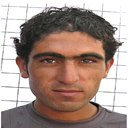

In [24]:
X_train[7]

In [25]:
X_train_scaled[7]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.96078431, 0.96078431, 0.95686275],
        [0.45490196, 0.41176471, 0.42745098],
        [0.36078431, 0

**Building a Convolutional Neural Networks (CNN)**

In [26]:
import tensorflow as tf
from tensorflow import keras

Setting up the architecture for our Neural network

In [27]:
num_of_classes = 2  #with mask and without mask

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) #input shape only in first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())   #to pass it as 1D, matrix to vector

model.add(keras.layers.Dense(128, activation='relu'))  #128 neurons in network, powers of 2 for being memory efficient
model.add(keras.layers.Dropout(0.5))                   #turning off some neurons to ensure Overfitting does not happen

model.add(keras.layers.Dense(64, activation='relu'))     #another dense layer
model.add(keras.layers.Dropout(0.5))

#sigmoid used for binary classification, softmax for multi class classification
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))  #for sigmoid activfunc, no. of neurons = no.of classes

Compiling NN

In [28]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Training NN


In [29]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 158s 916ms/step - loss: 0.4644 - acc: 0.8207 - val_loss: 0.2866 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 145s 854ms/step - loss: 0.2783 - acc: 0.8898 - val_loss: 0.2299 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 142s 835ms/step - loss: 0.2334 - acc: 0.9123 - val_loss: 0.2458 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 146s 858ms/step - loss: 0.2040 - acc: 0.9220 - val_loss: 0.2556 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 149s 879ms/step - loss: 0.1525 - acc: 0.9417 - val_loss: 0.2694 - val_acc: 0.9207


**Model Evaluation**

In [30]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 286ms/step - loss: 0.2598 - acc: 0.9133
Test Accuracy = 0.9133024215698242


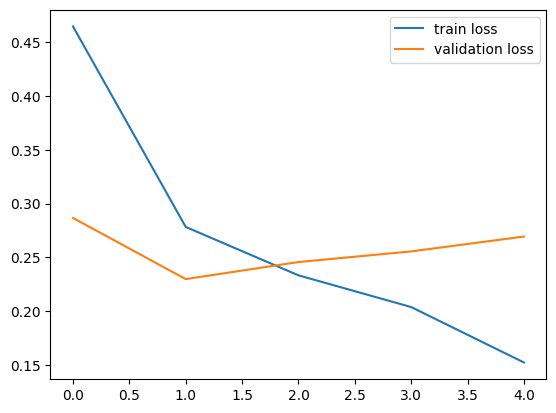

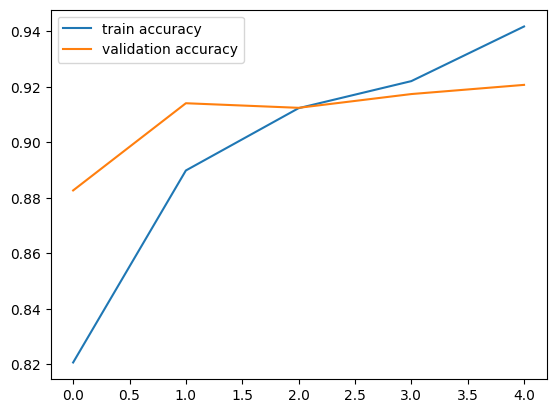

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/Screenshot 2024-06-01 112928.png


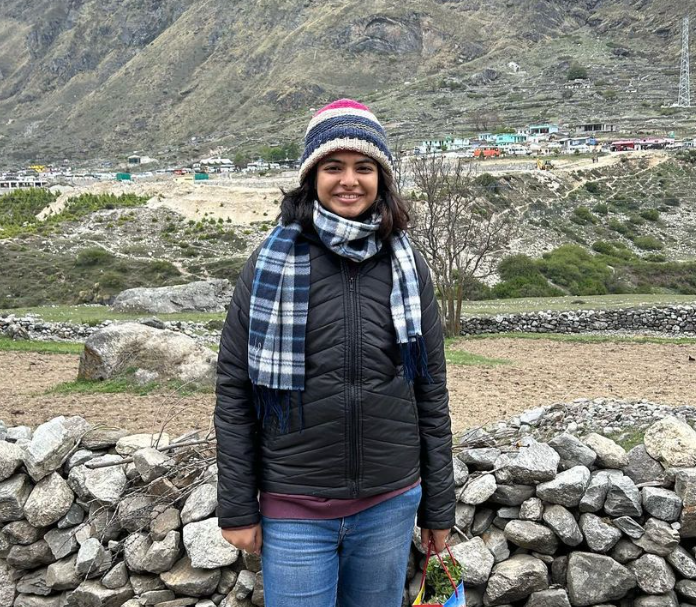

1/1 [==============================] - 0s 240ms/step
[[0.04343997 0.9653785 ]]
Accuracy: 0.9653785
The person in the image is not wearing a mask


In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

# Extract the predicted accuracy
accuracy = input_prediction[0][1]

print("Accuracy:", accuracy)

# Check if the accuracy is above 0.50
if accuracy > 0.50:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')



Path of the image to be predicted: /content/k.png


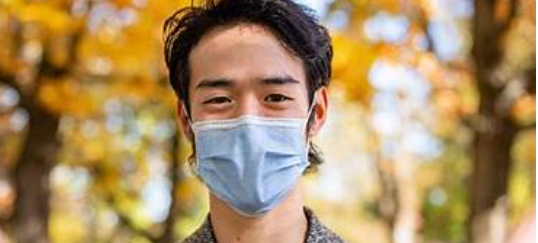

1/1 [==============================] - 0s 32ms/step
[[0.6264687  0.47048807]]
Accuracy: 0.47048807
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

# Extract the predicted accuracy
accuracy = input_prediction[0][1]

print("Accuracy:", accuracy)

# Check if the accuracy is above 0.50
if accuracy > 0.50:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')

